In [1]:
# 구글드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

# 작업 디렉토리 설정
import os
os.chdir('/content/drive/MyDrive/PyStat')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# 객체 내용/타입 출력
def printobj(*a):
    for x in a:
        display(x)
        print('\n', type(x), '\n')

# 기술 통계

기술 통계(descriptive statistics) : 수집한 데이터를 요약, 묘사, 설명하는 통계 기법
- 1변량(1차원) 데이터
  - 통계량 : 대표값(평균값/중앙값/최빈값), 산포도(분산/표준편차/범위)
  - 시각화 : 도수분포표, 히스토그램, 상자그림
- 다변량(다차원) 데이터
  - 통계량 : 1변량 + 두 변량 간 관계(공분산/상관계수)
  - 시각화 : 1변량 + 두 변량 간 관계(산점도/회귀선/히트맵)

## CHAP 2. 1차원 데이터 정리

- 데이터 정리 및 개요 파악

- 지표 / 시각화

- 2장과 3장
  - 학생 50명 시험 점수

- 2-1 \~ 2-3절
  - 수치 지표

- 2-4절
  - 가시화

- NumPy 추가

- 임포트

In [3]:
import numpy as np
import pandas as pd

# 소수점 이하 3자리까지 출력
%precision 3
pd.set_option('display.precision', 3)
np.set_printoptions(precision=3, suppress=True)

- ch2_scores_em.csv

In [4]:
# 작업 디렉토리 아래 data 폴더에 있는 csv 파일을 읽어 들여 DataFrame 자료구조로 저장한다.
df = pd.read_csv('data/ch2_scores_em.csv', index_col='student number')
df.head()  # df의 처음 5행만 출력

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


- 10명의 영어 점수

- NumPy ndarray

In [5]:
scores = np.array(df['english'])[:10]
printobj(scores)

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58])


 <class 'numpy.ndarray'> 



- DataFrame

In [6]:
names = ['A','B','C','D','E', 'F','G','H','I','J']
scores_df = pd.DataFrame({'score' : scores},
                         index=pd.Index(names, name='student'))
printobj(scores_df)

,score
student,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65



 <class 'pandas.core.frame.DataFrame'> 



### 2-1. 대표값

- 하나의 값으로 요약한 **대표값**

#### 1) 평균값

- 가장 잘 알려진 **평균값**(mean)

- 계산기, 암산?
<br><br>

$$
\frac{42+69+56+41+57+48+65+49+65+58}{10} = 55
$$<br>

- 파이썬으로 간단히

In [7]:
sum(scores) / len(scores)

55.0

- NumPy로 더욱 간단히

In [8]:
np.mean(scores)

55.0

- ndarray mean()

In [9]:
scores.mean()

55.0

- DataFrame mean()

In [10]:
scores_df.mean()

score    55.0
dtype: float64

- 주요 통계 용어의 영어 표현

- 합의 기호($Σ$)로 수식화

$$
μ = \frac{1}{N}\sum_{i=1}^N{x_i} = \frac{1}{N}(x_1+x_2+⋯+x_N)
\tag{2-1}
$$

- $n=10$, $x_1=42$, $x_2=69$, $x_3=56$, ···

- len(scores) $=N$<br>sum(scores) $=\sum_{i=1}^N{x_i}$

#### 2) 중앙값

- 중앙에 위치한 **중앙값**(median)

- $[9, 5, 7, 1, 3] → [1, 3, 5, 7, 9] → 5$

- 이상값(outlier)에 강하다(robust)

- $[1, 2, 3, 4, 5, 6, 1000]$

- 평균 $≃150$

- 중앙값 $≃4$

- 데이터 개수가 짝수

- $[1, 2, 3, 4, 5, 6]\;→\;$ 중앙값 $=3.5$

- 중앙값의 정의

> 데이터의 개수 $N$이 홀수라면,
> - $\frac{N+1}{2}$번째 데이터가 중앙값<br><br>
>
> 데이터의 개수 $N$이 짝수라면,
> - $\frac{N}{2}$번째 데이터와 $\frac{N}{2}+1$번째 데이터의 평균이 중앙값

- 영어 시험 점수의 중앙값
  - np.sort()

In [11]:
sorted_scores = np.sort(scores)
printobj(sorted_scores)

array([41, 42, 48, 49, 56, 57, 58, 65, 65, 69])


 <class 'numpy.ndarray'> 



- 중앙값의 정의 그대로 코딩
  - 리스트 인덱스 주의

In [12]:
N = len(sorted_scores)
if N % 2 == 0:
    m0 = sorted_scores[N//2 - 1]  # N/2 (∵ 인덱스가 0부터 시작하므로 1을 빼준다)
    m1 = sorted_scores[N//2]      # N/2 + 1
    median = (m0 + m1) / 2
else:
    median = sorted_scores[(N+1)//2 - 1]  # (N+1)/2

printobj(median)

56.5


 <class 'numpy.float64'> 



- NumPy median()

In [13]:
np.median(scores)

56.5

- DataFrame median()

In [14]:
scores_df.median()

score    56.5
dtype: float64

#### 3) 최빈값

- 가장 많이 나타나는 **최빈값**(mode)

- $[1, 1, 1, 2, 2, 3] → 1$

- DataFrame/Series mode()

In [15]:
pd.Series([1, 1, 1, 2, 2, 3]).mode()

0    1
dtype: int64

- 질적/범주형 데이터의 대표값

- 양적/수치형 데이터는 부적합

In [16]:
pd.Series([1, 2, 3, 4, 5]).mode()

0    1
1    2
2    3
3    4
4    5
dtype: int64

- 도수분포표로 가능

### 2-2. 산포도

- 흩어짐/모임의 정도

- 전원 50점 vs 절반씩 0점/100점

- 수치로 어떻게?

#### 1) 분산과 표준편차

##### <u>편차</u>

- 평균으로부터 떨어진 정도인 **편차**(deviation)

$$
deviation_i = x_i - μ,\;(i=1,2,\cdots,N)
\tag{2-2}
$$

- A 학생 42점 / 평균 55점
  - 편차 $=42-55=-13$점

- NumPy 브로드캐스트

In [17]:
mean = np.mean(scores)
deviation = scores - mean  # broadcast : array ± scalar (elementwise operation)
printobj(deviation, mean)

array([-13.,  14.,   1., -14.,   2.,  -7.,  10.,  -6.,  10.,   3.])


 <class 'numpy.ndarray'> 



55.0


 <class 'numpy.float64'> 



- 평균 : 파랑색 점 &nbsp;&nbsp; / &nbsp;&nbsp; 학생 점수 : 검은색 점 &nbsp;&nbsp; / &nbsp;&nbsp; 편차 : 연파랑색 직선

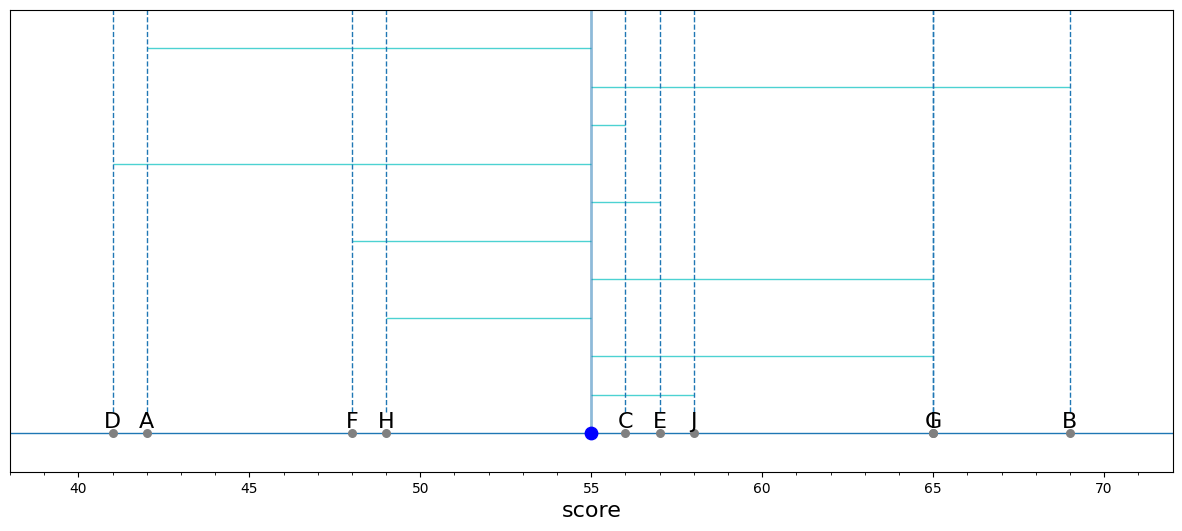

[그림 2-1] 점수와 편차의 분포


In [18]:
from pystatplot import plot_dev
x_range = plot_dev(names, scores)
print('[그림 2-1] 점수와 편차의 분포')

- 다른 학생 10명의 점수
  - $[50, 60, 58, 54, 51, 56, 57, 53, 52, 59]$

In [19]:
scores_a = np.array([50, 60, 58, 54, 51, 56, 57, 53, 52, 59])

- 평균 같음 / 편차 다름

In [20]:
mean_a = np.mean(scores_a)
deviation_a = scores_a - mean_a
printobj(deviation_a, mean_a)

array([-5.,  5.,  3., -1., -4.,  1.,  2., -2., -3.,  4.])


 <class 'numpy.ndarray'> 



55.0


 <class 'numpy.float64'> 



- 그림으로

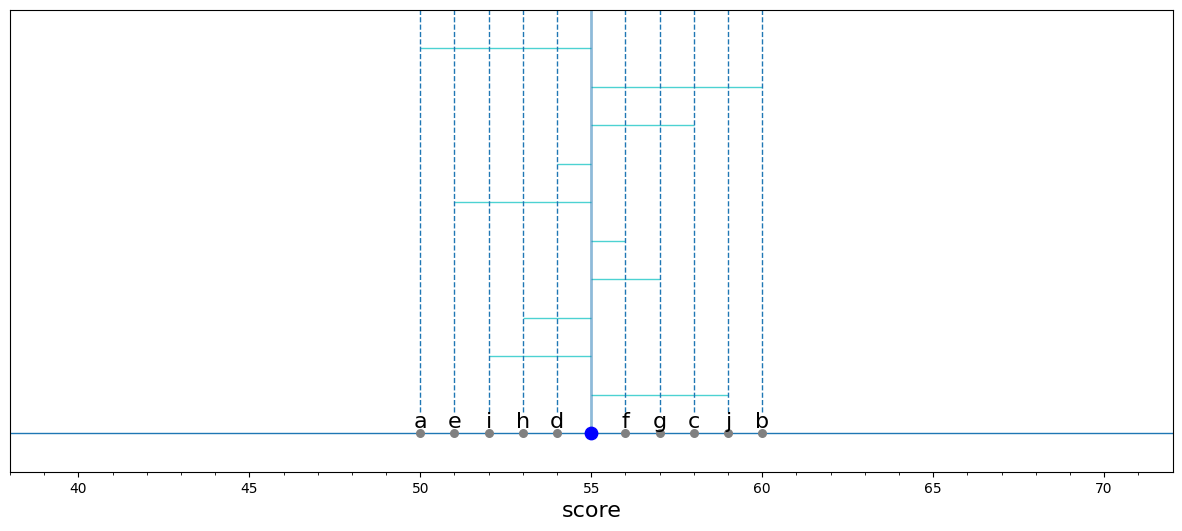

[그림 2-2] 평균은 같지만 편차가 더 작은 경우에 대한 점수와 편차의 분포


In [21]:
names_a = ['a','b','c','d','e', 'f','g','h','i','j']
plot_dev(names_a, scores_a, x_range)
print('[그림 2-2] 평균은 같지만 편차가 더 작은 경우에 대한 점수와 편차의 분포')

- 산포도 지표로 사용 가능할 듯

- 편차의 대표값이 필요

- 평균을 고려
  - 첫 번째(그림 2-1)의 경우

In [22]:
np.mean(deviation)

0.0

- 두 번째(그림 2-2)의 경우

In [23]:
np.mean(deviation_a)

0.0

- 모두 $0$으로 비교 불가

- 편차 평균은 항상 $0$

$$
\begin{align}
\frac{1}{N}\sum_{i=1}^N{(x_i-μ)} &= \frac{1}{N}\sum_{i=1}^N{x_i} - \frac{1}{N}\sum_{i=1}^{N}{μ} \\\\
&= μ - \frac{1}{N}{μ}N \\\\
&= 0
\end{align}
\tag{2-3}
$$

- 정리용 DataFrame

In [24]:
summary_df = scores_df.copy()
summary_df['deviation'] = deviation
printobj(summary_df)

,score,deviation
student,,
A,42,-13.0
B,69,14.0
C,56,1.0
D,41,-14.0
E,57,2.0
F,48,-7.0
G,65,10.0
H,49,-6.0
I,65,10.0



 <class 'pandas.core.frame.DataFrame'> 



- 점수/편차 평균 확인

In [25]:
summary_df.mean()

score        55.0
deviation     0.0
dtype: float64

##### <u>분산</u>

- 편차 평균의 문제점

- {'학생' : 편차} 데이터

In [26]:
# {'학생' : 편차} 딕셔너리로 만들어 출력
print(dict(zip(names, deviation)))

{'A': -13.0, 'B': 14.0, 'C': 1.0, 'D': -14.0, 'E': 2.0, 'F': -7.0, 'G': 10.0, 'H': -6.0, 'I': 10.0, 'J': 3.0}


- B, D 학생 : 산포도는 동일

- 편차 제곱의 평균인 **분산**(variance)

- 정의에 따라

In [27]:
sum(deviation**2) / N

86.0

- 또는

In [28]:
np.mean(deviation**2)

86.0

- NumPy var()

In [29]:
np.var(scores)

86.0

- ndarray var()

In [30]:
scores.var()

86.0

- 결과 모두 동일

- DataFrame var()

In [31]:
scores_df.var()

score    95.556
dtype: float64

- 다른 결과 나오는 문제
  - 인자(argument) 'ddof=0'로 해결

In [32]:
scores_df.var(ddof=0)

score    86.0
dtype: float64

> NumPy와 pandas의 var() 함수/매서드의
  - 매개변수(parameter) ddof에 설정된 기본값이 다르기 때문
>
> NumPy 빌트인 함수와 ndarray 객체 메서드의 기본값은 ddof=0
  - https://numpy.org/doc/stable/reference/generated/numpy.var.html
  - https://numpy.org/doc/stable/reference/generated/numpy.ndarray.var.html
>
> 반면에, pandas DataFrame 객체 메서드의 기본값은 ddof=1
  - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.var.html

> 인자 ddof(**d**elta **d**egrees **o**f **f**reedom)는
- 분산을 얻기위해 편차 제곱의 평균을 구할 때
>
> 분모로 나누는 값을
- 데이터의 전체 개수 $N$으로 나누는 것이 아닌
- $(N-ddof)$을 적용하여 나누게 하는 역할을 한다.
  - ddof=0 이면 $N$으로 나누게 하고
  - ddof=1 이면 $(N-1)$로 나누게 한다.

- NumPy var()의 ddof에 따른 결과

In [33]:
np.var(scores, ddof=0), sum(deviation**2)/N

(86.0, 86.0)

In [34]:
np.var(scores, ddof=1), sum(deviation**2)/(N-1)

(95.55555555555556, 95.55555555555556)

> 분산은 수행하고 있는 분석에 따라 다음과 같이 적용된다.
- 수집한 데이터를 잘 설명하기 위해 **기술 통계**를 수행하는 경우
  - 모분산 적용 : $N$으로 나눔 → ddof=0
- 수집한 데이터를 바탕으로 예측 등 **추론 통계**를 수행하는 경우
  - 표본분산 적용 : $(N-1)$으로 나눔 → ddof=1
>
> 모분산, 표본분산, ddof에 대한 보다 상세한 내용은 10장에서 설명한다.

- 항상 ddof 인자값 명기하여 호출

- 예를 들어, 'ddof=0' (기술 통계)

In [35]:
ddof = 0  # 'ddof=0'이 적용되는 분석을 수행하는 경우라면면
print(sum(deviation**2)/(N-ddof))  # python 코드
print(np.var(scores, ddof=0),      # NumPy 빌트인 함수
      scores.var(ddof=0))          # ndarray 메서드
print(scores_df.var(ddof=0))       # pandas DataFrame 메서드

86.0
86.0 86.0
score    86.0
dtype: float64


- 'ddof=1' (추론 통계)

In [36]:
ddof = 1  # ddof=1 이 적용되는 분석을 수행하는 경우라면
print(sum(deviation**2)/(N-ddof))  # python 코드
print(np.var(scores, ddof=1),      # NumPy 빌트인 함수
      scores.var(ddof=1))          # ndarray 메서드
print(scores_df.var(ddof=1))       # pandas DataFrame 메서드

95.55555555555556
95.55555555555556 95.55555555555556
score    95.556
dtype: float64


- 편차의 제곱 추가

In [37]:
summary_df['square of deviation'] = np.square(deviation)
printobj(summary_df)

,score,deviation,square of deviation
student,,,
A,42,-13.0,169.0
B,69,14.0,196.0
C,56,1.0,1.0
D,41,-14.0,196.0
E,57,2.0,4.0
F,48,-7.0,49.0
G,65,10.0,100.0
H,49,-6.0,36.0
I,65,10.0,100.0



 <class 'pandas.core.frame.DataFrame'> 



- 각각 평균 계산

In [38]:
summary_df.mean()

score                  55.0
deviation               0.0
square of deviation    86.0
dtype: float64

- 수식화

$$
σ^2 = \frac{1}{N}\sum_{i=1}^N{(x_i-μ)^2} = \frac{1}{N} \{ (x_1-μ)^2 + (x_2-μ)^2 + ⋯ + (x_N-μ)^2 \}
\tag{2-4}
$$

- 면적의 평균이라는 이미지로

In [39]:
from pystatplot import plot_var_interact
plot_var_interact(scores)
print('[그림 2-3] 한 변이 편차인 정사각형들의 평균 면적으로 나타낸 분산')

interactive(children=(IntSlider(value=42, description='A', min=1), IntSlider(value=69, description='B', min=1)…

[그림 2-3] 한 변이 편차인 정사각형들의 평균 면적으로 나타낸 분산


- A, B, C, D 문자 : 각각의 시험 점수
  - 중앙 가로선과 세로선 : 4명의 평균


- 회색 정사각형 4개 : A, B, C, D 편차의 제곱

- 중앙 연파랑 정사각형 : 회색 정사각형 4개의 평균 면적 $=$ 분산

- 평균/분산 변화 확인

##### <u>표준편차</u>

- 평균 55점

- 분산 86점<sup>2</sup> ???

- 분산의 제곱근인 **표준편차**(standard deviation)

- 정의에 따라

In [40]:
np.sqrt(np.var(scores, ddof=0))

9.273618495495704

- 파이썬 코드

In [41]:
(sum(deviation**2)/N)**(1/2)

9.273618495495704

- NumPy std() / ddof=0

In [42]:
np.std(scores, ddof=0)

9.273618495495704

- ndarray std()

In [43]:
scores.std(ddof=0)

9.273618495495704

- DataFrame std()

In [44]:
scores_df.std(ddof=0)

score    9.274
dtype: float64

- 동일 차원으로 시각화

In [45]:
from pystatplot import plot_std_interact
plot_std_interact(scores)
print('[그림 2-4] 점수와 편차, 그리고 표준편차')

interactive(children=(IntSlider(value=42, description='A', min=1), IntSlider(value=69, description='B', min=1)…

[그림 2-4] 점수와 편차, 그리고 표준편차


  - 가장 짙은 영역 : **1σ 구간** → 평균 ± 1 표준편차
  - 그 다음인 영역 : **2σ 구간** → 평균 ± 2 표준편차
  - 가장 옅은 영역 : **3σ 구간** → 평균 ± 3 표준편차

- 표준편차 변화 확인

- 수식화

$$
σ = \sqrt{σ^2} = \sqrt{\frac{1}{N}\sum_{i=1}^N{(x_i-μ)^2}}
\tag{2-5}
$$

- $\sigma$로 계산되는 과정

- 변수 x, μ, σ2, σ

- 실제 계산은 NumPy/pandas std()

- x의 요소 $x_i$

In [46]:
x = scores
x

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58])

- 평균

In [47]:
N = len(x)
μ = sum(x) / N
μ

55.0

- 편차 : 모든 요소에 '-μ' 연산

In [48]:
x - μ

array([-13.,  14.,   1., -14.,   2.,  -7.,  10.,  -6.,  10.,   3.])

- 편차의 제곱 : 모든 요소에 제곱 연산

In [49]:
(x - μ)**2

array([169., 196.,   1., 196.,   4.,  49., 100.,  36., 100.,   9.])

- 합

In [50]:
Σ = sum((x - μ)**2)
Σ

860.0

- N 나눔

In [51]:
σ2 = Σ / N
σ2

86.0

- 제곱근

In [52]:
σ = σ2**(1/2)
σ

9.273618495495704

- NumPy로 확인

In [53]:
np.var(x, ddof=0), np.std(x, ddof=0)

(86.0, 9.273618495495704)

#### 2) 범위와 사분위 범위

##### <u>범위</u>

- 최대·최소의 차이인 **범위**(range)

- 개략적 / 이상값에 취약

- 수식화

$$
range = x_\text{max} - x_\text{min}
\tag{2-6}
$$

- 파이썬 구현

In [54]:
max(scores) - min(scores)

28

##### <u>사분위 범위</u>

- 상·하위 특정 % 값

- Q1(25%), Q2(50%), Q3(75%) 위치로 정의하는 **사분위 범위**(interquartile range, IQR)

$$
IQR = Q3 - Q1
\tag{2-7}
$$

- scores의 IQR

In [55]:
scores_Q1 = np.percentile(scores, 25)
scores_Q3 = np.percentile(scores, 75)
scores_IQR = scores_Q3 - scores_Q1
printobj(scores_IQR)

15.0


 <class 'numpy.float64'> 



- IQR : 중앙값에 대한 산포도의 지표

#### 3) 데이터 지표의 정리

- describe() : 우선적으로 사용

In [56]:
scores_df.describe()

,score
count,10.000
mean,55.000
std,9.775
min,41.000
25%,48.250
50%,56.500
75%,63.250
max,69.000


### 2-3. 정규화

- 똑같은 60점

- 자체로 상대적인 위치를 알 수 있는 지표

- 편차값

- **정규화**(normalization)

- 표준화

#### 1) 표준화

- 평균을 빼고 표준편차로 나누는 **표준화**(standardization)

- 평균 0, 표준편차 1

- 표준화 변량(standardized data), Z 값(Z-value), Z 점수(Z-score)

- 단위 없어짐

- 수식화

$$
{z_i} = \frac{x_i-μ}{σ}
\tag{2-8}
$$

- 시험 점수 표준화

In [57]:
z = (scores - np.mean(scores)) / np.std(scores)
printobj(z)

array([-1.402,  1.51 ,  0.108, -1.51 ,  0.216, -0.755,  1.078, -0.647,
        1.078,  0.323])


 <class 'numpy.ndarray'> 



- 평균·표준편차 확인

In [58]:
np.mean(z), np.std(z, ddof=0)

(-1.6653345369377347e-17, 0.9999999999999999)

#### 2) 편차값

- 평균 50, 표준편차 10으로 정규화한 **편차값**(deviation value)

- 수식화

$$
z_i = 50 + 10 × \frac{x_i-μ}{σ}
\tag{2-9}
$$

- 각 학생의 편차값

In [59]:
z = 50 + 10 * (scores - np.mean(scores))/np.std(scores, ddof=0)
printobj(z)

array([35.982, 65.097, 51.078, 34.903, 52.157, 42.452, 60.783, 43.53 ,
       60.783, 53.235])


 <class 'numpy.ndarray'> 



- 점수 vs 편차값

In [60]:
scores_df['deviation value'] = z
printobj(scores_df)

,score,deviation value
student,,
A,42,35.982
B,69,65.097
C,56,51.078
D,41,34.903
E,57,52.157
F,48,42.452
G,65,60.783
H,49,43.530
I,65,60.783



 <class 'pandas.core.frame.DataFrame'> 



- 편차값으로 한눈에 파악

### 2-4. 시각화

- 시각적으로 파악할 수 있는 방법(visualization)

- 50명 영어 점수의 ndarray

In [61]:
english_scores = np.array(df['english'])

- 주요 지표 확인

In [62]:
pd.Series(english_scores).describe()

count    50.00
mean     58.38
std       9.80
min      37.00
25%      54.00
50%      57.50
75%      65.00
max      79.00
dtype: float64

#### 1) 도수분포표

- 데이터 분포 상태

- 구간의 데이터 개수를 세는 **도수분포표**(frequency distribution table)

- 계급(class) / 도수(frequency) / 계급폭 / 계급수

- np.histogram()로 도수 계산

In [63]:
freq, _ = np.histogram(english_scores, bins=10, range=(0, 100))
printobj(freq)

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0])


 <class 'numpy.ndarray'> 



- DataFrame 작성

In [64]:
# 0~10, 10~20, ...의 문자열들을 리스트로 만들어 DataFrame 인덱스로 준비
freq_class = [f'{i}~{i+10}' for i in range(0, 100, 10)]

# 'frequency'라는 이름의 freq를 하나의 컬럼으로 가지고
# 'class'라는 이름의 freq_class를 인덱스로 하는 DataFrame을 생성
freq_dist_df = pd.DataFrame({'frequency' : freq},
                            index=pd.Index(freq_class, name='class'))
printobj(freq_dist_df)

,frequency
class,
0~10,0
10~20,0
20~30,0
30~40,2
40~50,8
50~60,16
60~70,18
70~80,6
80~90,0



 <class 'pandas.core.frame.DataFrame'> 



- 값의 분포 쉽게 파악

- 계급과 도수 외에도

- **계급값**

In [65]:
# 모든 계급의 상·하한 중간값들을 계산하여 계급값 리스트를 만든다.
class_value = [(i+(i+10))//2 for i in range(0, 100, 10)]
printobj(class_value)

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]


 <class 'list'> 



- **상대도수**

In [66]:
rel_freq = freq / freq.sum()
printobj(rel_freq)

array([0.  , 0.  , 0.  , 0.04, 0.16, 0.32, 0.36, 0.12, 0.  , 0.  ])


 <class 'numpy.ndarray'> 



- **누적상대도수** : np.cumsum()

In [67]:
cum_rel_freq = np.cumsum(rel_freq)
printobj(cum_rel_freq)

array([0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.88, 1.  , 1.  , 1.  ])


 <class 'numpy.ndarray'> 



- 도수분포표에 추가

In [68]:
freq_dist_df['class value'] = class_value
freq_dist_df['relative frequency'] = rel_freq
freq_dist_df['cumulative relative frequency'] = cum_rel_freq
# 컬럼을 ['class value', 'frequency' ... ] 순서로 정렬한다.
freq_dist_df = freq_dist_df[['class value',
                             'frequency',
                             'relative frequency',
                             'cumulative relative frequency']]
printobj(freq_dist_df)

,class value,frequency,relative frequency,cumulative relative frequency
class,,,,
0~10,5,0,0.00,0.00
10~20,15,0,0.00,0.00
20~30,25,0,0.00,0.00
30~40,35,2,0.04,0.04
40~50,45,8,0.16,0.20
50~60,55,16,0.32,0.52
60~70,65,18,0.36,0.88
70~80,75,6,0.12,1.00
80~90,85,0,0.00,1.00



 <class 'pandas.core.frame.DataFrame'> 



- 상대도수 / 누적상대도수

##### <u>최빈값 재검토</u>

- 양적 데이터도 도수분포표로 가능

- 최대 도수 계급

In [69]:
class_max_freq = freq_dist_df['frequency'].idxmax()
class_max_freq

'60~70'

- 최빈값

In [70]:
freq_dist_df.loc[class_max_freq, 'class value']

65

- 계급폭 4점 $→$ 최빈값 66점

#### 2) 히스토그램

- 도수분포표를 막대그래프로 나타낸 **히스토그램**(histogram)

- Matplotlib

- 임포트

In [71]:
# Matplotlib의 pyplot 모듈을 plt라는 이름을 임포트
import matplotlib.pyplot as plt

# 그래프가 Jupyter Notebook 위에 표시되도록 설정
%matplotlib inline

- hist()

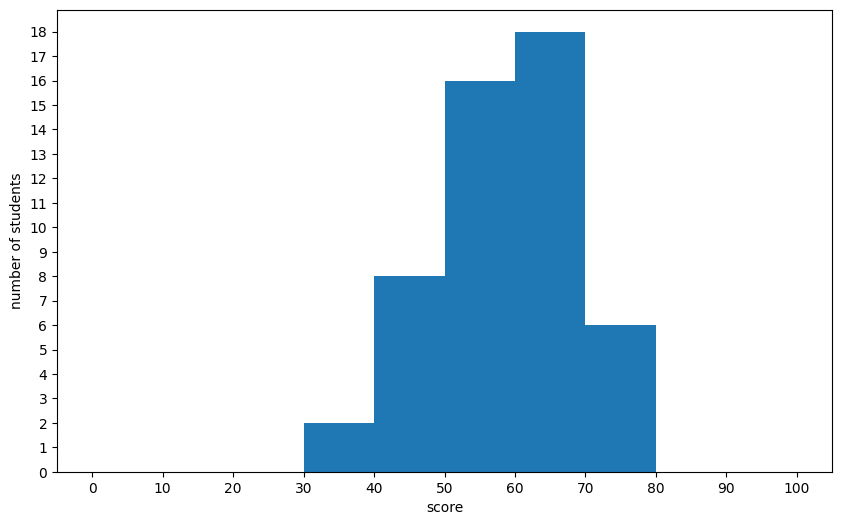

[그림 2-5] 영어 점수의 히스토그램 (계급폭이 10점)


In [72]:
# 캔버스를 생성
# figsize로 가로·세로 크기를 지정
fig = plt.figure(figsize=(10, 6))
# 켄버스 위에 그래프를 그리기 위한 영역을 지정
# 인자는 영역을 1×1개 지정, 하나의 영역에 그린다는 것을 의미
ax = fig.add_subplot(111)

# 계급수를 10으로 하여 히스토그램을 그림
freq, _, _ = ax.hist(english_scores, bins=10, range=(0, 100))
# X축에 레이블 부여
ax.set_xlabel('score')
# Y축에 레이블 부여
ax.set_ylabel('number of students')
# X축을 0, 10, 20, ..., 100 눈금으로 구분
ax.set_xticks(np.linspace(0, 100, 10+1))
# Y축을 0, 1, 2, ...의 눈금으로 구분
ax.set_yticks(np.arange(0, freq.max()+1))
# 그래프 표시
plt.show()
print('[그림 2-5] 영어 점수의 히스토그램 (계급폭이 10점)')

- 계급수 25 (계급폭 4점)

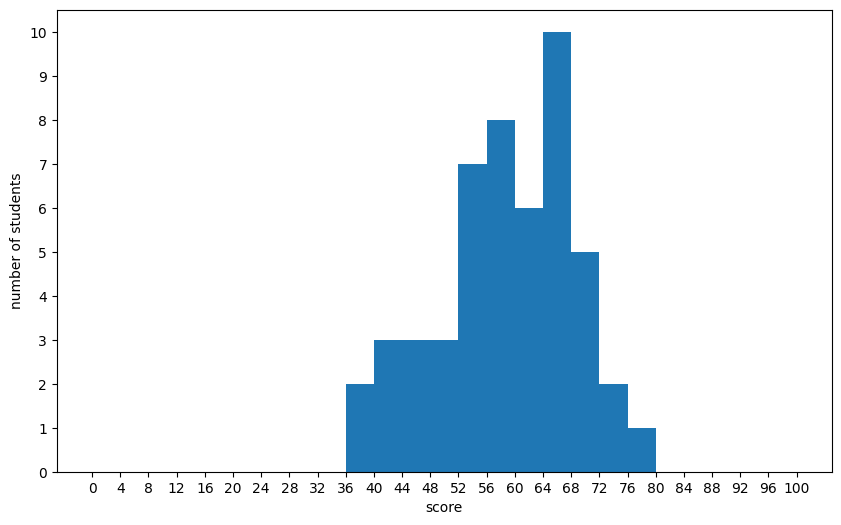

[그림 2-6] 영어 점수의 히스토그램 (계급폭이 4점)


In [73]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

freq, _ , _ = ax.hist(english_scores, bins=25, range=(0, 100))
ax.set_xlabel('score')
ax.set_ylabel('number of students')
ax.set_xticks(np.linspace(0, 100, 25+1))
ax.set_yticks(np.arange(0, freq.max()+1))
plt.show()
print('[그림 2-6] 영어 점수의 히스토그램 (계급폭이 4점)')

- 계급수(폭) 적절한 설정 중요

- 누적상대도수

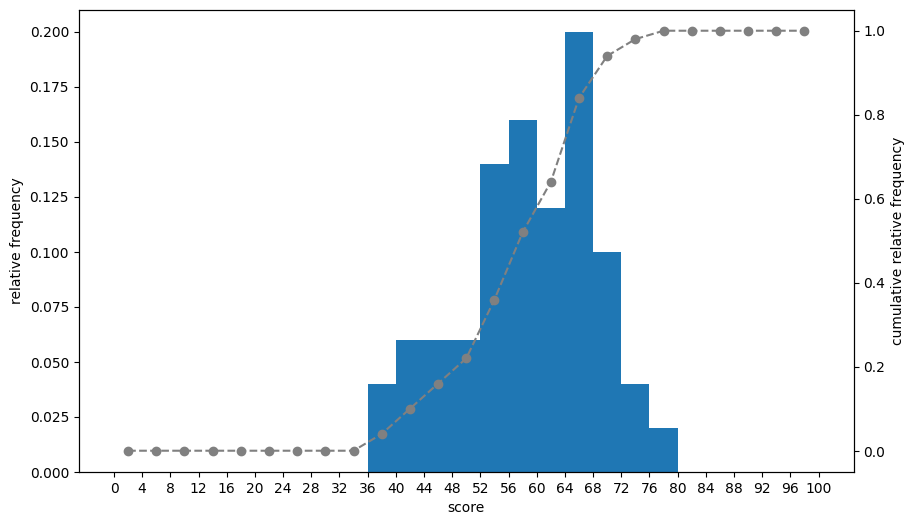

[그림 2-7] 영어 점수의 히스토그램과 누적상대도수


In [74]:
fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(111)
# Y축의 스케일이 다른 그래프를 ax1과 동일한 영역에 생성
ax2 = ax1.twinx()

# 상대도수의 히스토그램으로 하기 위해서는, 도수를 데이터의 수로 나눌 필요가 있음
# 이것은 hist의 인자 weight를 지정하면 실현 가능
weights = np.ones_like(english_scores) / len(english_scores)
rel_freq, _, _ = ax1.hist(english_scores, bins=25,
                          range=(0, 100), weights=weights)

cum_rel_freq = np.cumsum(rel_freq)
class_value = [(i+(i+4))//2 for i in range(0, 100, 4)]
# 꺾은선 그래프를 그림
# 인자 ls를 '--'로 하면 점선이 그려짐
# 인자 marker를 'o'으로 하면 데이터 점을 그람
# 인자 color를 'gray'로 하면 회색으로 지정
ax2.plot(class_value, cum_rel_freq,
         ls='--', marker='o', color='gray')
# 꺾은선 그래프의 눈금선을 제거
ax2.grid(visible=False)

ax1.set_xlabel('score')
ax1.set_ylabel('relative frequency')
ax2.set_ylabel('cumulative relative frequency')
ax1.set_xticks(np.linspace(0, 100, 25+1))

plt.show()
print('[그림 2-7] 영어 점수의 히스토그램과 누적상대도수')

#### 3) 상자그림

- 데이터의 산포도를 표현하는 **상자그림**

- $Q1$ / $Q2$ / $Q3$ / $IQR$

- 상자 : $Q1$ \~ $Q3$

- 수염 : $(Q1-1.5×IQR)$ \~ $(Q3+1.5×IQR)$ 최대·최소

- 이상값

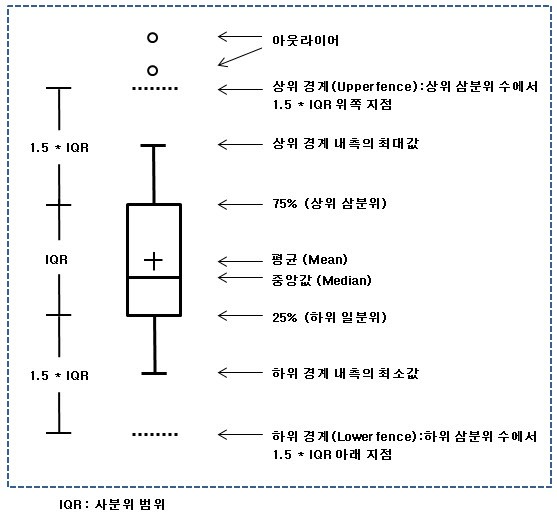

[그림 2-8] 상자그림의 구성

- Matplotlib boxplot()

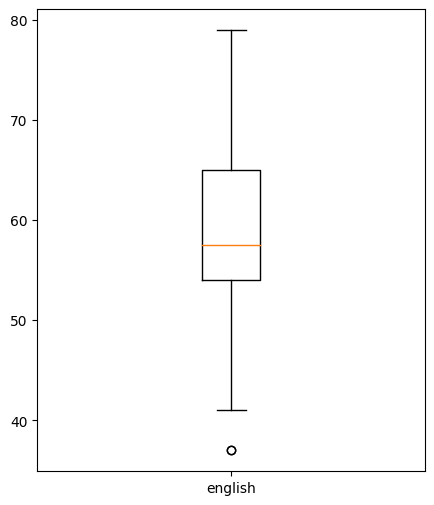

[그림 2-9] 영어 점수의 상자그림


In [75]:
fig = plt.figure(figsize=(5, 6))
ax = fig.add_subplot(111)
ax.boxplot(english_scores, labels=['english'])

plt.show()
print('[그림 2-9] 영어 점수의 상자그림')

- 60점 전후

- 상자그림 확인

In [76]:
# Q1, Q2(median), Q3 계산
es_Q1 = np.percentile(english_scores, 25)
es_Q2 = np.percentile(english_scores, 50)
es_Q3 = np.percentile(english_scores, 75)

# IRQ, lower·upper fence 계산
es_IQR = es_Q3 - es_Q1
es_lf = es_Q1 - 1.5*es_IQR
es_uf = es_Q3 + 1.5*es_IQR

# lower·upper fence 영역內의 데이터를 모아
# es_whisker에 저장
es_whisker = []
for es in english_scores:
    if es_lf < es < es_uf:
        es_whisker.append(es)

# lower·upper whisker 계산
es_lw = np.min(es_whisker)
es_uw = np.max(es_whisker)

# lower·upper outlier
es_lo = []
es_uo = []
for es in english_scores:
    if es < es_lw:
        es_lo.append(es)
    if es > es_uw:
        es_uo.append(es)

print('하위~상위 경계 구간 :', [es_lf, es_uf])
print('하위·상위 수염      :', [es_lw, es_uw])
print('상자 하부·중앙·상부 :', [es_Q1, es_Q2, es_Q3])
print('하위 이상값         :', es_lo)
print('상위 이상값         :', es_uo)

하위~상위 경계 구간 : [37.5, 81.5]
하위·상위 수염      : [41, 79]
상자 하부·중앙·상부 : [54.0, 57.5, 65.0]
하위 이상값         : [37, 37]
상위 이상값         : []
